Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [43]:
#Importing some important python packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame
import seaborn as sns

In [44]:
#Reading train and test dataset of used cars in India
train = pd.read_csv('Data_Train (2).csv')
test = pd.read_csv('Data_Test (2).csv')
train.shape

(6019, 12)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


# 1. Data Cleaning and Preparation

In [46]:
#Null values present in training data
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [47]:
#Extracted the brand name of the car by splitting the name column
train['Name'] = train.Name.str.split().str.get(0)
test['Name'] = test.Name.str.split().str.get(0)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### 1.1 Dealing with missing values

In [48]:
#Getting columns with missing values
train.columns[train.isnull().any()]

Index(['Mileage', 'Engine', 'Power', 'Seats'], dtype='object')

SEATS COLUMN

In [49]:
#Filling missing places with mean of the seats column
train['Seats'].fillna(train['Seats'].mean(),inplace=True)
test['Seats'].fillna(test['Seats'].mean(),inplace=True)

In [50]:
#Combining test and train data now for more accurate values
data = pd.concat([train,test], sort=False)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


MILEAGE COLUMN

In [51]:
#plt.figure(figsize=(20,5))
#data['Mileage'].value_counts().head(100).plot.bar()
#plt.show()

In [52]:
#Filling the null values in mileage column with 17 as referred by above bar plot
train['Mileage'] = train['Mileage'].fillna('17.0 kmpl')
test['Mileage'] = test['Mileage'].fillna('17.0 kmpl')

#Replacing the entries having 0 mileage with 17 too
train['Mileage'] = train['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
test['Mileage'] = test['Mileage'].replace("0.0 kmpl", "17.0 kmpl")

ENGINE COLUMN

In [53]:
#plt.figure(figsize=(20,5))
#data['Engine'].value_counts().head(100).plot.bar()
#plt.show()

In [54]:
train['Engine'] = train['Engine'].fillna('1197 CC')
test['Engine'] = test['Engine'].fillna('1197 CC')

POWER COLUMN

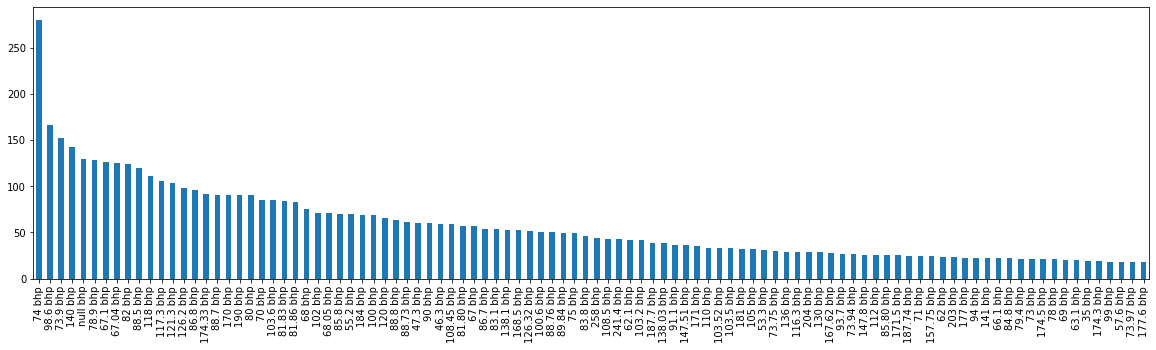

In [55]:
plt.figure(figsize=(20,5))
data['Power'].value_counts().head(100).plot.bar()
plt.show()

In [56]:
train['Power'] = train['Power'].fillna('74 bhp')
test['Power'] = test['Power'].fillna('74 bhp')

#Replacing nullbhp with 74 too
train['Power'] = train['Power'].replace("null bhp", "74 bhp")
test['Power'] = test['Power'].replace("null bhp", "74 bhp")

In [57]:
train['Mileage'] = train['Mileage'].str.replace(r'\D', '')
train['Engine'] = train['Engine'].str.replace(r'\D', '')
train['Power'] = train['Power'].str.replace(r'\D', '')
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,284,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,244,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,140,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,189,998,671,5.0,2.65


In [58]:
test['Mileage'] = test['Mileage'].str.replace(r'\D', '')
test['Engine'] = test['Engine'].str.replace(r'\D', '')
test['Power'] = test['Power'].str.replace(r'\D', '')
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,3226,998,582,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,247,796,473,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,1368,2393,1478,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,2359,1364,74,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,185,1197,8285,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,2054,1598,1036,5.0
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,1721,1197,1036,5.0
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,2308,1461,631,5.0
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,172,1197,1036,5.0


In [59]:
#Seeing the missing values after data cleaning
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [60]:
#train set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [61]:
#test set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1234 non-null object
Power                1234 non-null object
Seats                1234 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [62]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 12 columns):
Name                 7253 non-null bool
Location             7253 non-null bool
Year                 7253 non-null bool
Kilometers_Driven    7253 non-null bool
Fuel_Type            7253 non-null bool
Transmission         7253 non-null bool
Owner_Type           7253 non-null bool
Mileage              7253 non-null bool
Engine               7253 non-null bool
Power                7253 non-null bool
Seats                7253 non-null bool
Price                7253 non-null bool
dtypes: bool(12)
memory usage: 141.7 KB


In [63]:
test = pd.read_csv('Data_Test (2).csv')
test= test.dropna()



test[['Company', 'Model']]= test['Name'].str.split(' ', 1, expand= True)
test[['mileage', 'Unit1']]= test['Mileage'].str.split(' ',1,expand=True)
test[['engine', 'Unit2']]= test['Engine'].str.split(' ',1,expand=True)
test[['power', 'Unit3']]= test['Power'].str.split(' ',1,expand=True)
test=test.drop(['Name', 'Unit1', 'Unit2', 'Unit3', 'Mileage', 'Engine', 'Power', 'Model'], axis=1)
loc1=pd.get_dummies(test.Location)
fuel1=pd.get_dummies(test.Fuel_Type)
transmition1=pd.get_dummies(test.Transmission)
owner1=pd.get_dummies(test.Owner_Type)
company1=pd.get_dummies(test.Company)
test= pd.concat([test,loc1,fuel1,transmition1,owner1,company1], axis= 'columns')
test= test.drop(['Location', 'Pune', 'Petrol', 'Fuel_Type', 'Transmission', 'Automatic','Owner_Type', 'First', 'Company'], axis='columns')
test.replace('null', '0', inplace=True)
test.shape


(1223, 52)

### 1.2 Visualisations

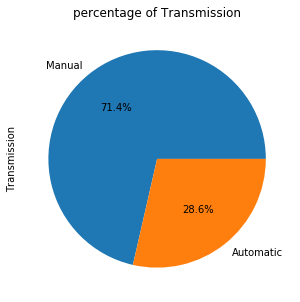

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns
%matplotlib inline

train["Transmission"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(5,5))
plt.title("percentage of Transmission")
plt.show()


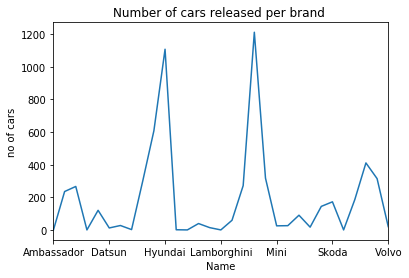

In [65]:
f, axes = plt.subplots()
train.groupby("Name")["Name"].count().plot(ax=axes)
axes.set_ylabel("no of cars")
axes.set_title("Number of cars released per brand ")

plt.show()

In [66]:
#f, axes = plt.subplots ()

#x=['CNG','Diesel','Petrol','LPG','Electric']
#y = [train.Fuel_Type[(train['Fuel_Type']=='CNG')].count(),train.Fuel_Type[(train['Fuel_Type']=='LPG')].count(),
    # train.Fuel_Type[(train['Fuel_Type']=='Diesel')].count(),train.Fuel_Type[(train['Fuel_Type']=='Electric')].count(),
     #train.Fuel_Type[(train['Fuel_Type']=='Petrol')].count()]
#plt= sns.barplot(x,y)  
#plt.set(xlabel='Types Of fuel types',ylabel='Number of cars in each fuel type')
    

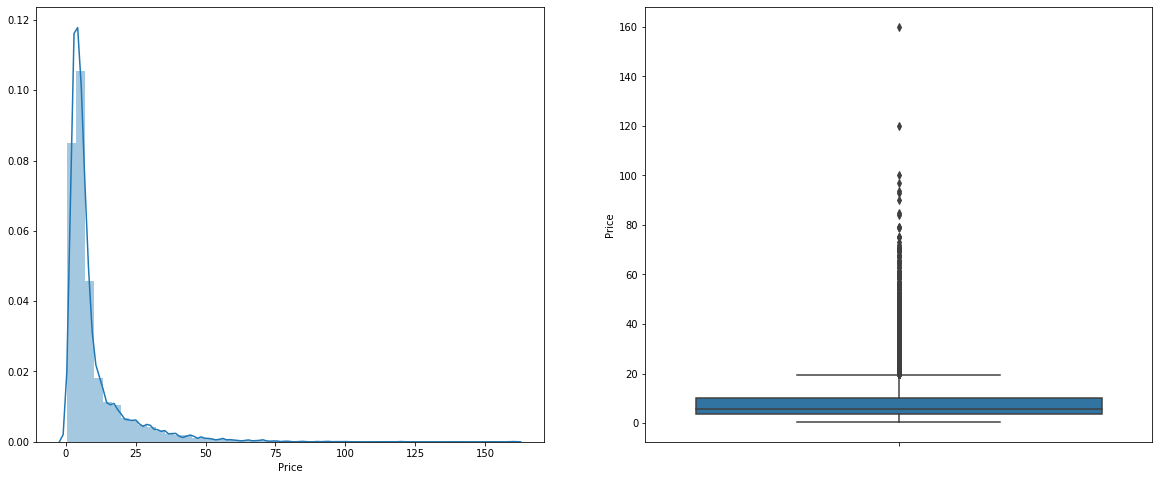

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(train['Price'])

plt.subplot(1,2,2)
sns.boxplot(y=train['Price'])
plt.show()

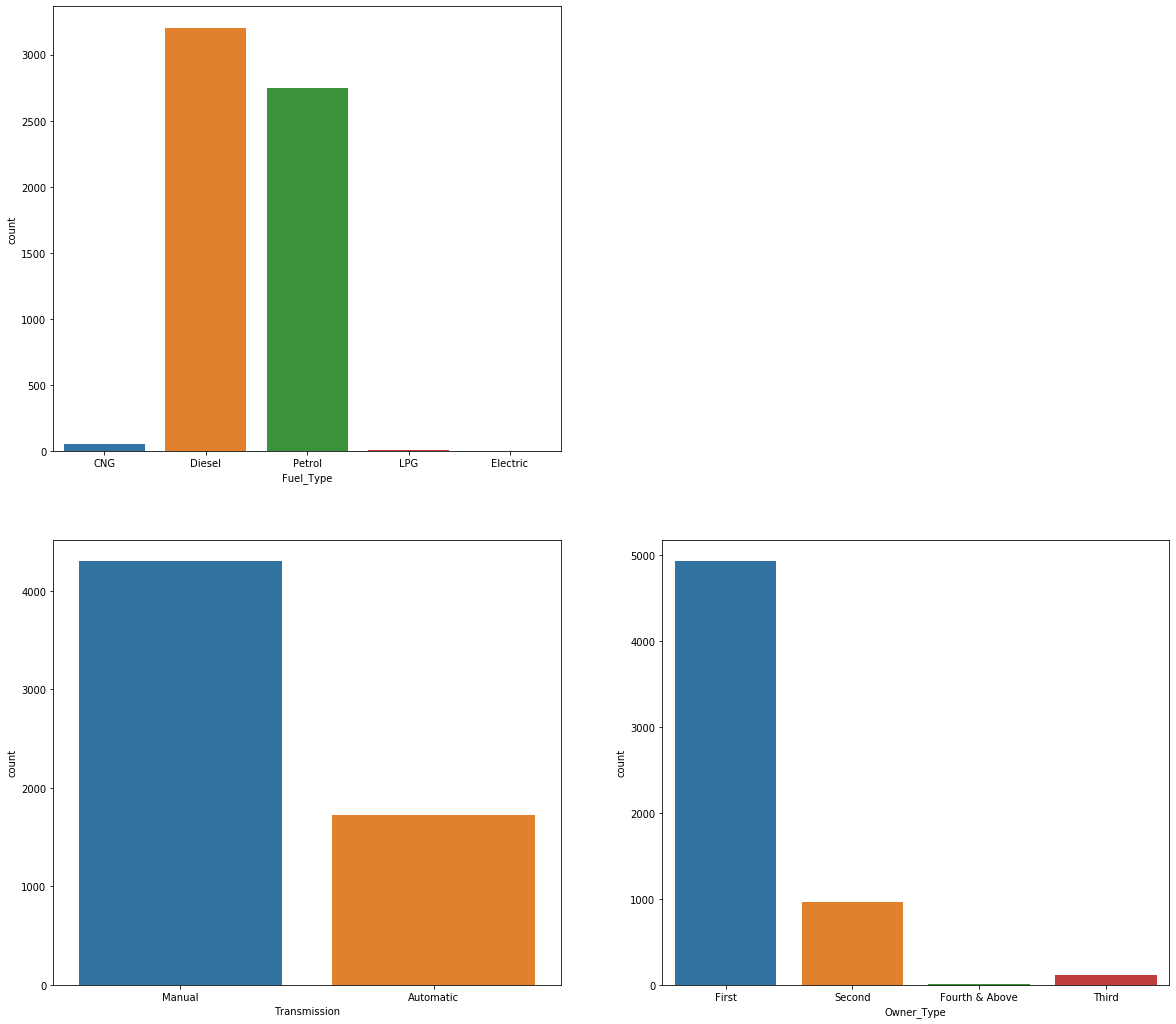

In [68]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
#g1 = sns.countplot(x='Name', data=train)
#loc,labels = plt.xticks()
#g1.set_xticklabels(labels,rotation=90)
#fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=train)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Transmission', data=train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

Text(0.5, 0, 'Power')

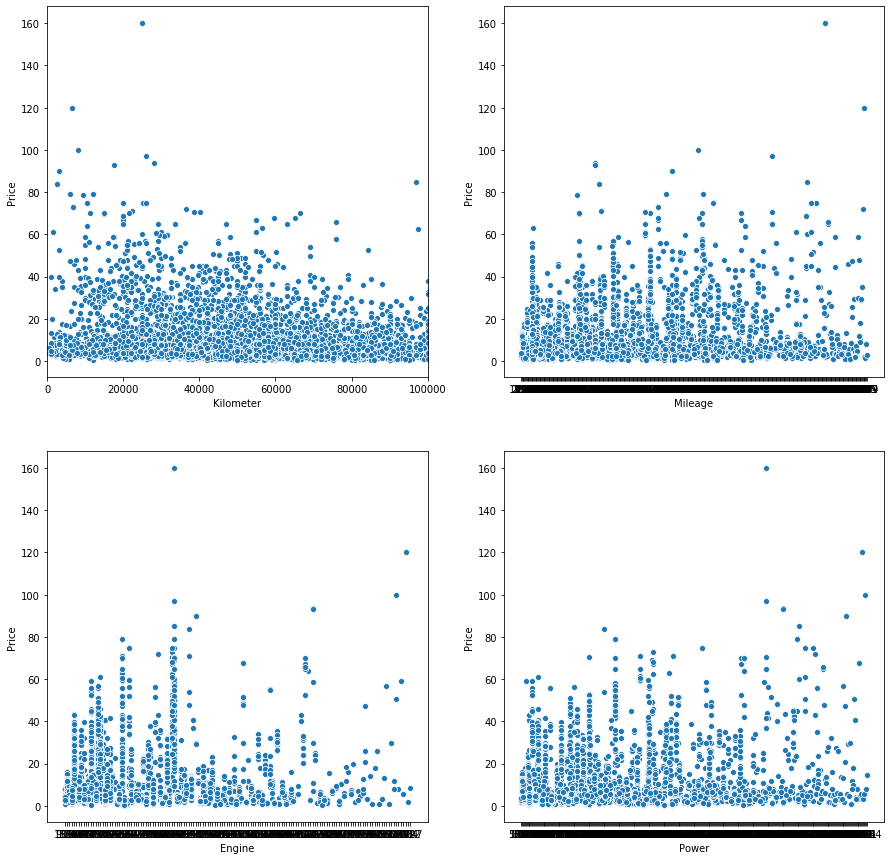

In [69]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
#plt.xlim([0, 100000])
p2 = sns.scatterplot(x="Mileage", y="Price", data=train)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
#plt.xlim([0, 100000])
p3 = sns.scatterplot(x="Engine", y="Price", data=train)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
#plt.xlim([0, 100000])
p4 = sns.scatterplot(x="Power", y="Price", data=train)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

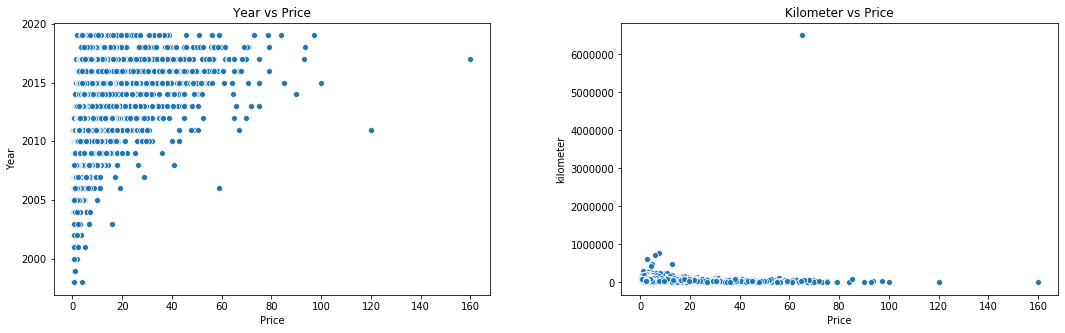

In [70]:
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x='Price', y="Year", data=train)
ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax1.set_title('Year vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x='Price', y='Kilometers_Driven', data=train)
ax2.set_ylabel('kilometer')
ax2.set_xlabel('Price')
ax2.set_title('Kilometer vs Price')
plt.show()

In [71]:
 data_clean= pd.read_csv('Data_Train (2).csv')

In [72]:
data_clean.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [73]:
data_clean['Model_name'] = data_clean['Name'].apply(lambda x: str(x).split(" ")[1])

In [74]:
names = list(data_clean.Name)
for i in range(len(names)):
    names[i] = names[i].split(' ', 1)[0]
data_clean.Name = names#data_clean.head()

In [75]:
data_clean.drop(data_clean[data_clean['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

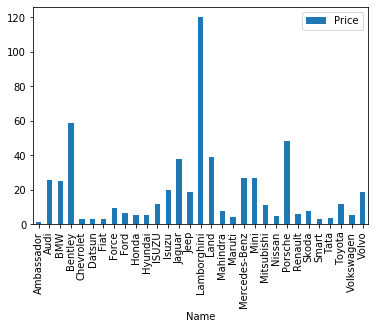

In [76]:
df_vis_1 = pd.DataFrame(data_clean.groupby('Name')['Price'].mean())
df_vis_1.plot.bar()
plt.show()

Text(0.5, 1.0, 'Fuel vs Price')

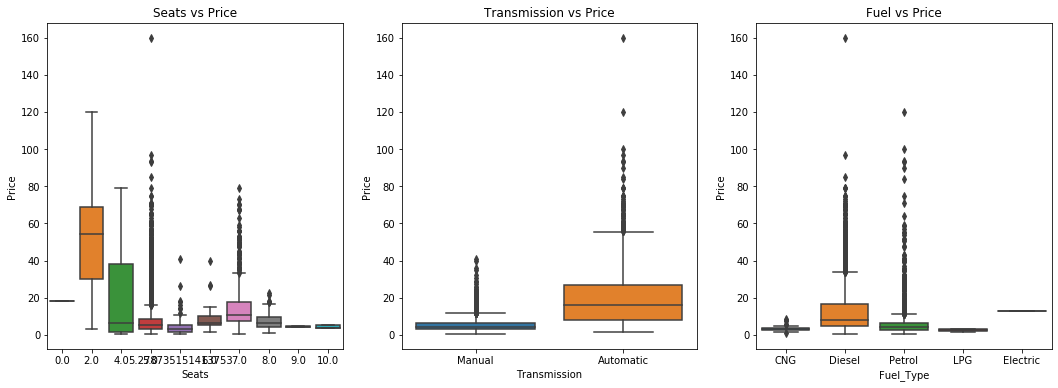

In [77]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=train)
ax1.set_title('Seats vs Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=train)
ax2.set_title('Transmission vs Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=train)
ax3.set_title('Fuel vs Price')


In [78]:
data_clean.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model_name
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35,EON
6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,Micra
7,Toyota,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50,Innova
8,Volkswagen,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20,Vento
9,Tata,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95,Indica


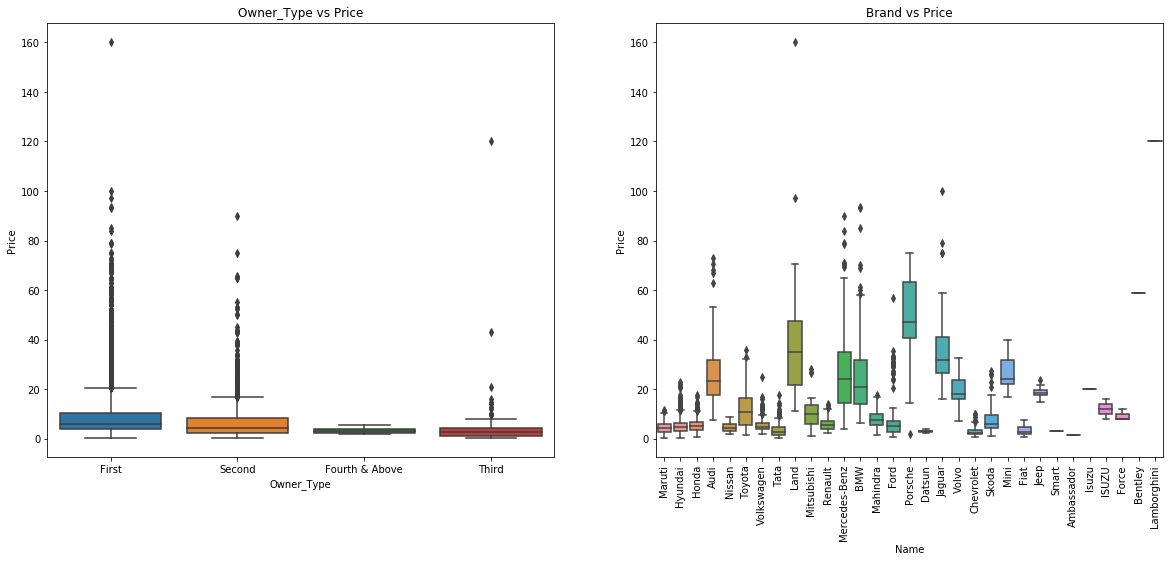

In [79]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Owner_Type', y='Price', data=data_clean)
ax1.set_title('Owner_Type vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Name', y='Price', data=data_clean)
loc,labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=90)
ax2.set_title('Brand vs Price')
plt.show()

# 2.Model

In [80]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
train= pd.read_csv('Data_Train (2).csv')

train= train.dropna()



train[['Company', 'Model']]= train['Name'].str.split(' ', 1, expand= True)
train[['mileage', 'Unit1']]= train['Mileage'].str.split(' ',1,expand=True)
train[['engine', 'Unit2']]= train['Engine'].str.split(' ',1,expand=True)
train[['power', 'Unit3']]= train['Power'].str.split(' ',1,expand=True)
train=train.drop(['Name', 'Unit1', 'Unit2', 'Unit3', 'Mileage', 'Engine', 'Power', 'Model'], axis=1)
loc=pd.get_dummies(train.Location)
fuel=pd.get_dummies(train.Fuel_Type)
transmition=pd.get_dummies(train.Transmission)
owner=pd.get_dummies(train.Owner_Type)
company=pd.get_dummies(train.Company)
train= pd.concat([train,loc,fuel,transmition,owner,company], axis= 'columns')
train= train.drop(['Ambassador','Lamborghini','Location', 'Pune', 'Petrol', 'Fuel_Type', 'Transmission', 'Automatic','Owner_Type', 'First', 'Company'], axis='columns')
train.replace('null', '0', inplace=True)


Cars_reg= linear_model.LinearRegression()
X= train.drop('Price', axis='columns')
X
Y= train.Price
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.22, random_state=1)
Cars_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##  Predicting the Train Data

In [81]:
from pandas import DataFrame
df=Cars_reg.predict(X_test)
result = pd.DataFrame({'Actual values': Y_test ,'Predicted': df})
result

,Actual values,Predicted
4912,12.26,10.738738
1754,4.25,4.078037
2991,1.70,-2.405689
3076,12.50,12.354274
2595,6.97,9.413538
...,...,...
16,5.40,6.976824
5352,5.85,6.963741
5269,7.50,13.229997
2601,4.50,3.315558


In [82]:
from sklearn.metrics import r2_score

r2_score(df, Y_test)

0.7428200996306529

## Predicting the Test Data

In [83]:
predicted  = pd.DataFrame({ 'Predicted': Cars_reg.predict(test)})
predicted

,Predicted
0,1.338730
1,1.174739
2,16.462932
3,0.615532
4,4.023976
...,...
1218,5.036786
1219,5.603076
1220,0.665445
1221,5.016848
